# Global Data Trends

This notebook will investigate periodic trends in Covid-19 case and death data, taken from the [John Hopkins Database](https://coronavirus.jhu.edu/about).

In [62]:
import re
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '17'

from analysis import generate_all_df, rel_reporting_calc, generate_pca_array, generate_pca_df ,test_normalisation, run_pca

In [26]:
# Import/Generate Data
input_dir = "../COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/"
output_dir = "../data/country_data/"

# generate_all_df(input_dir, output_dir, overwrite_files=False)
pca_array = generate_pca_array(output_dir, 'Cases')
test_normalisation(pca_array, rtol=0.05)
pca_output = run_pca(np.transpose(pca_array), n_components=2)
print(pca_output.round(2))

There were 13 rows out of tolerance.
Explained variation per principal component: [0.35611786 0.31409958]
       PC1    PC2
Mon   9.03  15.32
Tue  -4.69   5.12
Wed  -9.01   0.58
Thu  -7.69  -1.33
Fri  -6.41  -2.76
Sat   5.66 -11.38
Sun  13.10  -5.55


In [27]:
cases_df = generate_pca_df(output_dir, 'Cases')
cases_df.to_csv("../data/country_trends_cases.csv")

Antarctica excluded with trend ['0.00', '7.00', '0.00', '0.00', '0.00', '0.00', '0.00']
Benin excluded with trend ['0.61', '0.83', '3.34', '0.86', '0.56', '0.15', '0.35']
Botswana excluded with trend ['2.64', '0.69', '0.28', '2.55', '0.33', '0.04', '0.21']
KoreaNorth excluded with trend ['0.00', '0.00', '0.00', '0.00', '0.00', '7.00', '0.00']
Nicaragua excluded with trend ['0.12', '0.06', '6.21', '0.48', '0.03', '0.06', '0.00']
Oman excluded with trend ['1.05', '1.07', '1.14', '0.98', '0.22', '0.20', '2.35']
Palau excluded with trend ['0.91', '2.04', '0.99', '0.59', '1.90', '0.28', '0.58']
SummerOlympics2020 excluded with trend ['1.81', '0.49', '0.52', '2.10', '0.53', '1.07', '0.18']
Sweden excluded with trend ['0.35', '2.35', '1.19', '2.00', '1.01', '0.17', '0.14']
Tanzania excluded with trend ['0.78', '1.93', '2.35', '0.74', '0.58', '0.02', '0.25']


C:\Users\galla\AppData\Local\Temp\ipykernel_20404\2109990091.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);


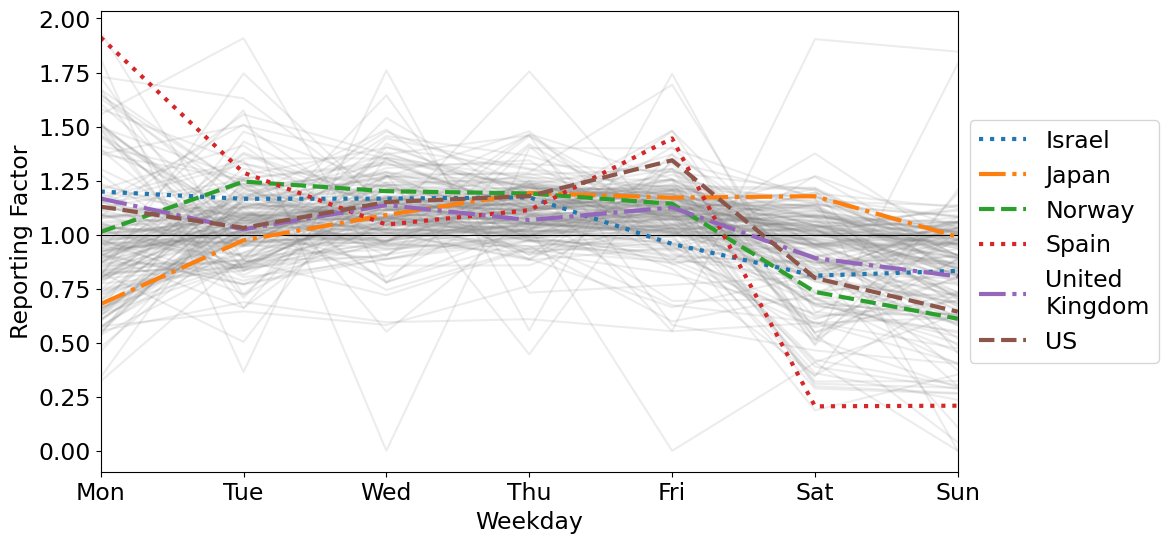

In [70]:
named_countries = [ 'Israel', 'Japan', 'Norway', 'Spain', 'UnitedKingdom', 'US']
linestyles = [':', '-.', '--']

fig, ax = plt.subplots(1, figsize=(12, 6))

for i, row in cases_df.iterrows():
    if max(row[1:] > 2):  # Option to exlcude countries with extreme trends 
        print(f"{row[0]} excluded with trend {['%.2f' % x for x in row[1:].values]}")
        continue
    if row[0] in named_countries:
        j = named_countries.index(row[0])
        name = label = re.sub(r'((?<=[a-z])[A-Z]|(?<!\A)[A-Z](?=[a-z]))', r' \n\1', row[0])
        plt.plot(range(7), row.values[1:], label = name, linewidth=3, zorder=2, linestyle=linestyles[j%3])
    else:
        plt.plot(range(7), row.values[1:], alpha=0.15, linewidth=1.5, color='gray', zorder=0)

ax.hlines(1, 0, 6, linestyle = '-', linewidth = 0.8, color='k', zorder = 1)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);
plt.xlim(0, 6); plt.xlabel('Weekday'); plt.ylabel("Reporting Factor")

box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle(''); plt.tight_layout()
plt.savefig(f"../images/data_trends/global_cases_trends.pdf")

In [29]:
deaths_df = generate_pca_df(output_dir, 'Deaths')
deaths_df.to_csv("../data/country_trends_deaths.csv")

Benin excluded with trend ['0.91', '0.89', '2.88', '0.72', '0.66', '0.27', '0.36']
Bhutan excluded with trend ['0.00', '0.60', '0.00', '2.17', '2.47', '0.99', '0.81']
BosniaandHerzegovina excluded with trend ['2.01', '1.46', '1.03', '0.96', '1.04', '0.26', '0.25']
Botswana excluded with trend ['3.22', '0.82', '0.16', '2.42', '0.14', '0.00', '0.13']
BurkinaFaso excluded with trend ['0.75', '2.45', '1.54', '0.80', '0.51', '0.46', '0.40']
Burundi excluded with trend ['2.29', '0.00', '1.00', '0.00', '1.00', '1.00', '2.00']
DiamondPrincess excluded with trend ['0.00', '2.33', '2.33', '0.00', '1.75', '0.00', '0.00']
Gabon excluded with trend ['2.23', '0.33', '1.31', '0.55', '1.56', '0.71', '0.00']
Iceland excluded with trend ['0.98', '2.43', '0.94', '1.10', '1.14', '0.07', '0.28']
Ireland excluded with trend ['0.36', '0.93', '3.25', '0.87', '0.70', '0.62', '0.26']
Kazakhstan excluded with trend ['1.29', '0.56', '0.54', '0.47', '0.51', '0.21', '3.39']
Kiribati excluded with trend ['1.75', '2.

C:\Users\galla\AppData\Local\Temp\ipykernel_20404\1380791777.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);


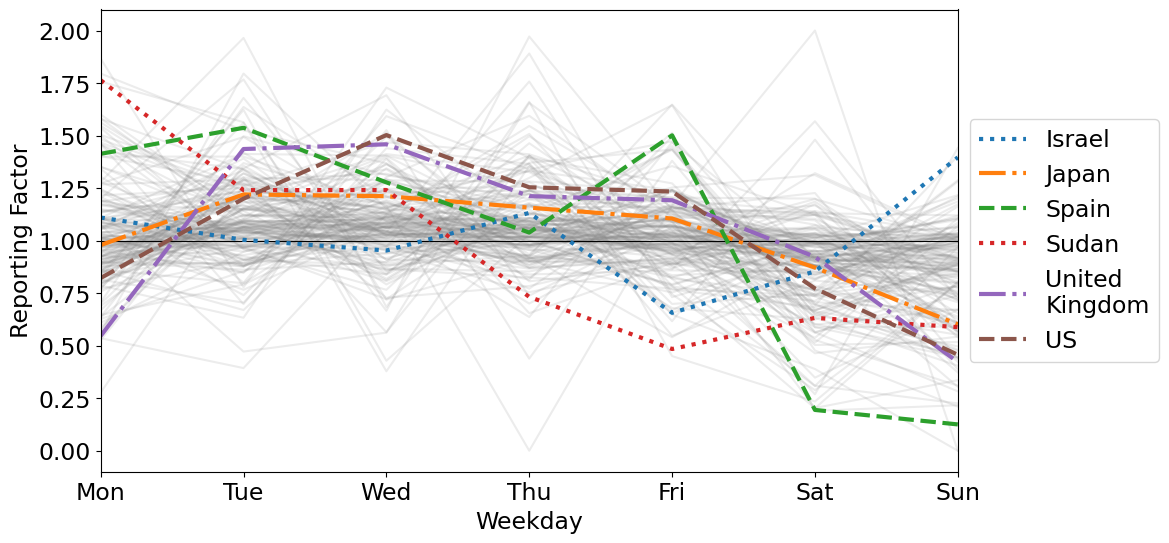

In [78]:
named_countries = [ 'Israel', 'Japan', 'Spain', 'Sudan', 'UnitedKingdom', 'US']
linestyles = [':', '-.', '--']

fig, ax = plt.subplots(1, figsize=(12, 6))

for _, row in deaths_df.iterrows():
    if max(row[1:] > 2):  # Option to exlcude countries with extreme trends 
        print(f"{row[0]} excluded with trend {['%.2f' % x for x in row[1:].values]}")
        continue
    if row[0] in named_countries:
        j = named_countries.index(row[0])
        name = label = re.sub(r'((?<=[a-z])[A-Z]|(?<!\A)[A-Z](?=[a-z]))', r' \n\1', row[0])
        plt.plot(range(7), row.values[1:], label = name, linewidth=3, zorder=2, linestyle=linestyles[j%3])
    else:
        plt.plot(range(7), row.values[1:], linewidth=1.5, alpha=0.15, color='gray', zorder=0)

ax.hlines(1, 0, 6, linestyle = '-', linewidth = 0.8, color='k', zorder = 1)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);
plt.xlim(0, 6); plt.xlabel('Weekday'); plt.ylabel("Reporting Factor")

box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle(''); plt.tight_layout()
plt.savefig(f"../images/data_trends/global_deaths_trends.pdf")

Benin excluded with trend ['0.91', '0.89', '2.88', '0.72', '0.66', '0.27', '0.36']
Bhutan excluded with trend ['0.00', '0.60', '0.00', '2.17', '2.47', '0.99', '0.81']
BosniaandHerzegovina excluded with trend ['2.01', '1.46', '1.03', '0.96', '1.04', '0.26', '0.25']
Botswana excluded with trend ['3.22', '0.82', '0.16', '2.42', '0.14', '0.00', '0.13']
BurkinaFaso excluded with trend ['0.75', '2.45', '1.54', '0.80', '0.51', '0.46', '0.40']
Burundi excluded with trend ['2.29', '0.00', '1.00', '0.00', '1.00', '1.00', '2.00']
DiamondPrincess excluded with trend ['0.00', '2.33', '2.33', '0.00', '1.75', '0.00', '0.00']
Gabon excluded with trend ['2.23', '0.33', '1.31', '0.55', '1.56', '0.71', '0.00']
Iceland excluded with trend ['0.98', '2.43', '0.94', '1.10', '1.14', '0.07', '0.28']
Ireland excluded with trend ['0.36', '0.93', '3.25', '0.87', '0.70', '0.62', '0.26']
Kazakhstan excluded with trend ['1.29', '0.56', '0.54', '0.47', '0.51', '0.21', '3.39']
Kiribati excluded with trend ['1.75', '2.

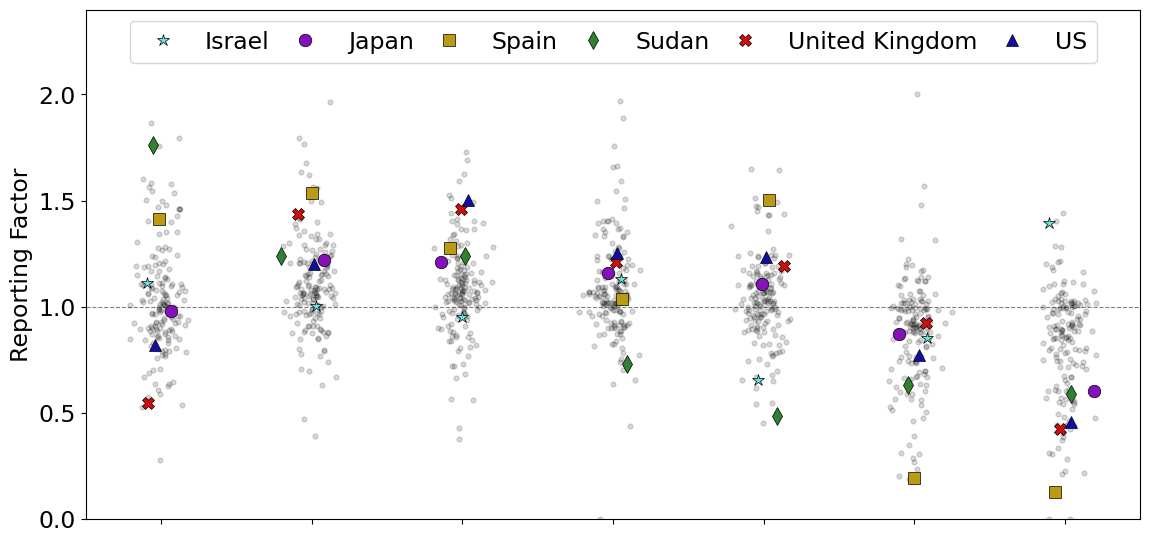

In [122]:
named_countries = [ 'Israel', 'Japan', 'Spain', 'Sudan', 'UnitedKingdom', 'US']
markers = ['*', 'o', 's', 'd', 'X', '^']
colors = ['#68e3db', '#8511ba', '#ba9b11', '#308230', '#d10d0d', '#120da3']
np.random.seed(39)

fig, ax = plt.subplots(1, figsize=(12, 6))

for _, row in deaths_df.iterrows():
    if max(row[1:] > 2) or min(row[1:] == 0):  # Option to exlcude countries with extreme trends 
        print(f"{row[0]} excluded with trend {['%.2f' % x for x in row[1:].values]}")
        continue
    x_vals = [x + np.random.normal(scale=0.075) for x in range(7)]
    if row[0] in named_countries:
        j = named_countries.index(row[0])
        name = label = re.sub(r'((?<=[a-z])[A-Z]|(?<!\A)[A-Z](?=[a-z]))', r' \1', row[0])
        plt.plot(x_vals, row.values[1:], label = name, linewidth=3, zorder=2, linestyle='',
                 color = colors[j%len(colors)], marker = markers[j%len(markers)], markersize = 9, markeredgewidth=0.5, markeredgecolor='k')
    else:
        plt.plot(x_vals, row.values[1:], linewidth=1.5, alpha=0.15, color='k', zorder=1, linestyle='', marker = '.', markersize=7)

ax.hlines(1, -0.5, 6.5, linestyle = '--', linewidth = 0.8, color='gray', zorder = 0)
ax.set_xticklabels([]) #['', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);
plt.xlim(-0.5, 6.5); plt.ylim(0, 2.4); plt.ylabel("Reporting Factor"); # plt.xlabel('Weekday');

box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc=9, ncol=6, columnspacing = 0.5) #, bbox_to_anchor=(1, 0.5))

plt.suptitle(''); plt.tight_layout()
plt.savefig(f"../images/data_trends/global_deaths_trends.pdf")